# Classification
**Adapted from Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron**

https://github.com/ageron/handson-ml

## Classification of MNIST dataset

The MNIST dataset consists of 70,000 small images of handwritten digits  by high school students and employees of the US Census Bureau.

Each image is labeled with the digit it represents.

The goal of classification is, after being trained, to predict a class for a new sample. The output is a discrete label.

In [1]:
from platform import python_version
python_version()

'3.7.4'

In [2]:
import sklearn
sklearn.__version__

'0.21.3'

In [3]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

In [4]:
# conda install -c conda-forge tensorflow 
# conda install -c conda-forge keras
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# load data
(X_train, y_train),(X_test, y_test)= mnist.load_data()

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
# reshape the data to 784 features (28*28)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784) 

In [7]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [8]:
y_train.shape, y_test.shape

((60000,), (10000,))

70,000 images and each images has 784 features.

Each image has 28x28 pixels and each feature represents one pixel's intensity, from 0 (white) to 255 (black).

To visualize one digit from the dataset:

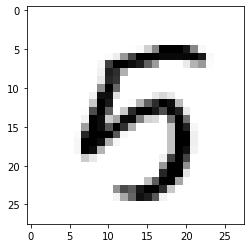

In [9]:
# choose an instance's feature vector
some_digit = X_train[27000]

# reshape to 28x28 array
some_digit_image = some_digit.reshape(28, 28)

# display the image
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation = 'nearest');

In [10]:
# image label
y_train[27000]

5

MNIST dataset is already split into a training set (first 60,000 images) and a test set (last 10,000 images).

In [11]:
# shuffle the training set
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training a Binary Classifier

Create a binay classifier to detect digit 5:

In [12]:
# true for all 5s and false for all the other digits
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Stochastic Gradient Descent (SGD) classifier is able to handle very large datasets efficiently. 

SGD classifier relies on randomness during training so to obtain reproducible results set the `random_state` parameter.

In [13]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state = 42)
sgd.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

After being fitted, the model can be used to detect images of th number 5:

In [14]:
sgd.predict([some_digit])

array([ True])

In [15]:
new_digit = X_train[4000]

In [16]:
# new_digit label
y_train[4000]

9

In [17]:
# predict new_digit label
sgd.predict([new_digit])

array([False])

## Performance Meassures
### Measuring Accuracy Using Cross-validation
#### Implementing Cross-Validation

Use the `cross_val_score()` function to evaluate the `SGDClassifier` using K-fold cross-validation. That means splitting the training set into K-folds then making predictions and evaluating each fold using a model trained on the remaining folds:

In [18]:
from sklearn.model_selection import cross_val_score
# cv determines the number of folds
cross_val_score(sgd, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9681 , 0.95655, 0.95515])

**Accuracy**: measures the fraction of all instances that are correctly categorized. It is the ratio of the number of correct classifications to the total number of (correct or incorrect) classifications.

$Accuracy = \frac{TP + TN}{TP+TN+FP+FN} = \frac{TP + TN}{P+N}$

BUT: only 10% of the images are 5s so if you guess that a number is not a 5, you will be right 90% of the time.

Accuracy is not the preferred performance measure for classifiers, specially when dealing with skewed datasets.

**Confusion matrix**: count the number of times instances of class A are classified as class B, a set of predictions is necesary to compare them to the actual targets.

In [19]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd, X_train, y_train_5, cv=3)

`cross_val_predict()` performs K-fold validation and returns the predictions made on each test fold.

In [20]:
from sklearn.metrics import confusion_matrix

# tn, fp, fn, tp
confusion_matrix(y_train_5, y_train_pred)

array([[53124,  1455],
       [  949,  4472]])

**Confusion matrix**

Rows: actual class 

Columns: predicted class

First row: negative class

Second row: positive class

**Precision**: accuracy of the positive predictions

$Precision = \frac{TP}{TP+FP}$

**Recall, Sensitivity or True Positive Rate**: rate of positive instances correctly detected by the classifier

$Recall = \frac{TP}{TP+FN}$

In [21]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.754513244474439

In [22]:
recall_score(y_train_5, y_train_pred)

0.8249400479616307

To combine precision and recall into a single metric:

**F1 score**: harmonic mean of precision and recall

$F_1\text{ score} = 2\frac{(\text{precision} \cdot \text{recall})}{(\text{precision} + \text{recall})}$


In [23]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7881565033486078

### Precision / Recall Tradeoff

In [24]:
# get the confidence score for the example sample
y_score_some_digit = sgd.decision_function([some_digit])
y_score_some_digit

array([1746.39916161])

In [25]:
threshold = 0
y_some_digit_pred = (y_score_some_digit > threshold)
y_some_digit_pred

array([ True])

In [26]:
# changing the threshold leads to different predictions
threshold = y_score_some_digit + 1
y_some_digit_pred = (y_score_some_digit > threshold)
y_some_digit_pred

array([False])

In [27]:
# predict y with decision function
y_scores = cross_val_predict(sgd, X_train, y_train_5, cv=3, 
                             method='decision_function')
y_scores

array([-18922.19789678,  -9437.14784295,  -2464.76484921, ...,
        -7512.63380148, -16501.63029593, -16429.11305816])

In [28]:
from sklearn.metrics import precision_recall_curve

# calculate the precision recall curve using the predictions and 
# the correct labels
precision, recall, thresholds = precision_recall_curve(y_train_5, 
                                                         y_scores)
precision

array([0.09047516, 0.09045998, 0.09046149, ..., 1.        , 1.        ,
       1.        ])

The threshold value that gives the best precision / recall tradeoff for the task can be selected:

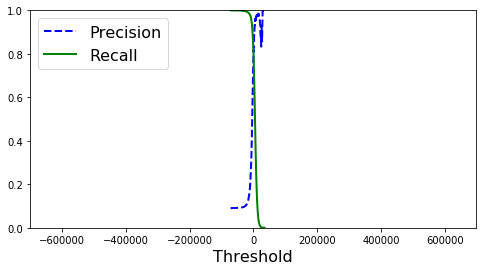

In [29]:
def plot_precision_recall_vs_threshold(p, r, t):
    plt.plot(t, p[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(t, r[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precision, recall, thresholds)
plt.xlim([-700000, 700000]);

The plot shows Precision and Recall as a function of the threshold. With this graph it is possible to select the best presicion/recall trade off for the task. A high-precision classifier is not useful if its recall is too low.

In [30]:
# 90% precision
y_train_pred_90 = (y_scores > 180000)
precision_score(y_train_5, y_train_pred_90)

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [31]:
recall_score(y_train_5, y_train_pred_90)

0.0

### The ROC Curve

Receiver operating characteristic (ROC) curve plots the true posive rate (recall) against the false positive rate (FPR). These and other important measures are the following:

$\text{Recall, Sensitivity or True Positive Rate (TPR)} = \frac{TP}{TP+FN} = 1 - FNR$

$\text{Specificity or True Negative Rate (TNR)} = \frac{TN}{TN+FP} = 1 - FPR$

$\text{False Positive Rate (FPR) or Fall-Out} = \frac{FP}{FP+TN} = 1 - TNR$

$\text{False Negative Rate (TNR) or Miss Rate} = \frac{FN}{FN+TP} = 1 - TPR$


In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

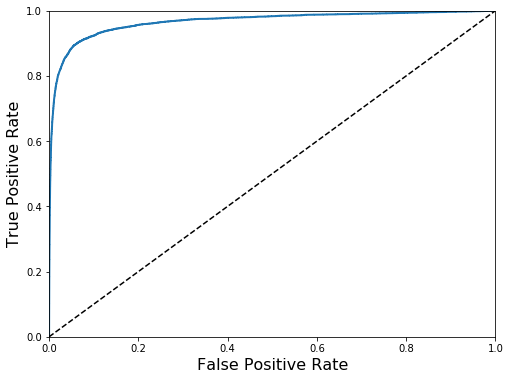

In [33]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

The dotted line represents the ROC curve of a purely random classifier, a good classifier stays far away from the line as possible.

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

In [34]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9660259463088996

Train a `RandomForestClassifier` and compare its ROC curve and ROC AUC score to the `SGDClassifier`.

In [35]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, 
                                    X_train, 
                                    y_train_5, 
                                    cv=3,
                                    method="predict_proba")

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


A ROC curve needs scores not probabilities like the ones obtained with `RandomForestClassifier`. So use the the positive class's probability as the score: 

In [36]:
# score = probability of the positive class
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,
                                                      y_scores_forest)

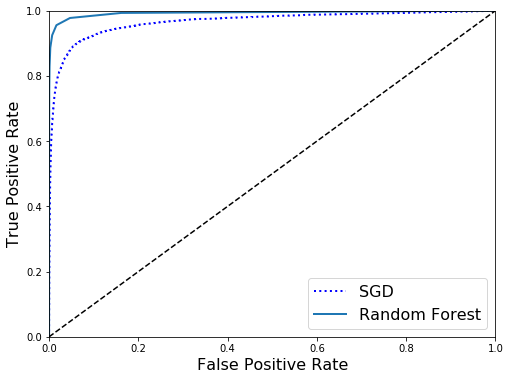

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16);

Random Forest Classifier´s ROC curve is better that the SGD´s ROC curve because it's closer to the top-left corner.

The ROC AUC score is also better: 

In [38]:
roc_auc_score(y_train_5, y_scores_forest)

0.9928250745111685

In [39]:
y_train_pred_forest = cross_val_predict(forest_clf, 
                                        X_train, 
                                        y_train_5, 
                                        cv=3)
precision_score(y_train_5, y_train_pred_forest)

/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/mabeigier/anaconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9870386643233744

In [40]:
recall_score(y_train_5, y_train_pred_forest)

0.8288138719793396

## Multiclass Classification

Multiclass classifiers distinguish between more than two classes.

Some algorithms handle multiple classes directly. Others are strictly binary classifiers. However there are strategies to perform multiclass classification using multiple binary classifiers. 

scikit-learn detects when you try to use a binary classification algorithm for a multiclass classification task and runs a one-versus-all strategy (or one-versus-the-rest).

In [41]:
sgd_clf = SGDClassifier(random_state = 42)

In [42]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

scikit-learn trained 10 binary classifiers, got decision scores for the image and selected the class with the highest score. To see this process call the `decision_function()` method, it will return 10 scores, one per class:

In [43]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -7236.73282925, -29422.8978827 ,  -7994.84359029,
         -7051.40398456,  -1167.06638739,   -280.01624435,
         -4013.74322494, -34807.61878917,  -3014.55785685,
         -3481.75964009]])

In [44]:
# select the highest score, in this case is the one for class 5
np.argmax(some_digit_scores)

5

In [45]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Warning!! When a classifier is trained, it stores the list of target classes in `classes_` attribute, ordered by value. In this case, the index of each class in the array matches the class itself but it is not always the case.

In [46]:
sgd_clf.classes_[5]

5